In [ ]:
!pip install datasets
!pip install straug

In [2]:
import pandas as pd
import os
from datasets import Dataset, Image
import random
from straug.geometry import Rotate


In [3]:
def get_dataset(csv_path: os.PathLike) -> Dataset:
    df = pd.read_csv(csv_path)

    data_dict = {'img': df['img_path']}

    if 'label' in df.columns:
        data_dict['label'] = df['label']

    dataset = Dataset.from_dict(data_dict)
    dataset = dataset.cast_column('img', Image())
    return dataset

In [4]:
def rotate(raw):
    aug_prob = 1 # 원하는 확률 선택
    if random.random() < aug_prob:
        raw['img'] = [
            Rotate()(image.convert("RGB")) for image in raw['img']
        ]
    return raw

In [5]:
train_dataset = get_dataset('data/preprocess/train.csv')
train_dataset.set_transform(rotate)

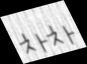

In [6]:
train_dataset[2]['img']

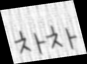

In [7]:
train_dataset[2]['img']